In [1]:
import toolkit

### First, we gather the dataset. This is a history of Java static code metrics and change metrics for our project.

In [2]:
rootDirectory = '../dataSets/okhttpStudy/'
# Call gatherTimeMetrics and measure Java, Indent and Change metrics 
# on .java files from the git project's repository


# Call gatherTimeMetrics and measure Java and change metrics 
# on .java files from the git project's repository
metricsDataMaven = toolkit.data.gatherTimeMetrics(rootDirectory, 'https://github.com/square/okhttp.git', rootDirectory+'okhttp/', '*/*.java *.java', ['java'], skipEvery=50)

In [3]:
metricsDataMaven['data']

,entity,age-months,n-authors,n-revs,added,deleted,fractal-value,soc,netchurn,cbo,...,assignmentsQty,mathOperationsQty,variablesQty,maxNestedBlocks,anonymousClassesQty,subClassesQty,lambdasQty,uniqueWordsQty,modifiers,time
0,okhttp/src/test/java/okhttp3/internal/http2/Ht...,0,2,6,90,61,0.28,8,29,34,...,262,12,261,3,6,-2,0,391,24,2019-07-25
1,okhttp-sse/src/test/java/okhttp3/internal/sse/...,0,2,2,3,8,0.50,12,-5,12,...,12,3,10,0,0,0,0,45,17,2019-07-25
2,okhttp/src/test/java/okhttp3/internal/http2/Ht...,0,2,6,128,6,0.44,14,122,86,...,231,7,214,8,22,-9,1,438,16,2019-07-25
3,okhttp/src/test/java/okhttp3/CacheTest.java,1,3,4,43,9,0.63,7,34,37,...,295,136,282,1,6,-4,3,561,14,2019-07-25
4,okhttp/src/test/java/okhttp3/ConnectionCoalesc...,1,2,2,105,7,0.50,6,98,20,...,34,0,32,1,2,-1,3,182,16,2019-07-25
5,okhttp/src/test/java/okhttp3/EventListenerTest...,1,3,4,8,18,0.63,28,-10,68,...,154,11,141,5,12,-5,3,239,13,2019-07-25
6,okhttp/src/test/java/okhttp3/internal/ws/WebSo...,1,2,4,17,17,0.50,24,0,40,...,89,8,82,2,14,-7,3,248,10,2019-07-25
7,okhttp/src/test/java/okhttp3/CallTest.java,1,4,10,95,19,0.64,32,76,118,...,435,35,377,10,52,-25,8,731,1,2019-07-25
8,okhttp/src/test/java/okhttp3/DispatcherTest.java,1,2,2,5,6,0.50,16,-1,16,...,36,0,36,2,0,0,4,120,17,2019-07-25
9,okhttp/src/test/java/okhttp3/internal/connecti...,1,3,6,49,22,0.50,8,27,13,...,28,0,28,1,0,0,0,91,17,2019-07-25


### How many times did we sample from?

In [4]:
print metricsDataMaven['times']

47


### How many features and samples are in our dataset?

In [5]:
print metricsDataMaven['data'].shape

(2404, 50)


### How many unique source files were measured?

In [6]:
print metricsDataMaven['data']['entity'].nunique()

843


In [7]:
print metricsDataMaven['data'].head

<bound method DataFrame.head of                                                entity  age-months  n-authors  \
0   okhttp/src/test/java/okhttp3/internal/http2/Ht...           0          2   
1   okhttp-sse/src/test/java/okhttp3/internal/sse/...           0          2   
2   okhttp/src/test/java/okhttp3/internal/http2/Ht...           0          2   
3         okhttp/src/test/java/okhttp3/CacheTest.java           1          3   
4   okhttp/src/test/java/okhttp3/ConnectionCoalesc...           1          2   
5   okhttp/src/test/java/okhttp3/EventListenerTest...           1          3   
6   okhttp/src/test/java/okhttp3/internal/ws/WebSo...           1          2   
7          okhttp/src/test/java/okhttp3/CallTest.java           1          4   
8    okhttp/src/test/java/okhttp3/DispatcherTest.java           1          2   
9   okhttp/src/test/java/okhttp3/internal/connecti...           1          3   
10       okhttp/src/test/java/okhttp3/DuplexTest.java           1          2   
11      

# Change Metrics
### Let's see what affects the net churn of files 
### Which types of files have net churn above and below the mean net churn?

In [8]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import psutil
cores = psutil.cpu_count()
estimators = 100

x = metricsDataMaven['data'].drop(['netchurn', 'added', 'deleted', 'entity', 'time'],axis=1)
y = np.array(metricsDataMaven['data']['loc'])

print "Decision Tree"
dt = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
scoresDT = cross_val_score(dt, x, y)
print("Accuracy: %0.2f (+/- %0.2f)" % (scoresDT.mean(), scoresDT.std() * 2))



Decision Tree


/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Accuracy: 0.67 (+/- 0.28)


In [9]:
# We split the data into 5 equally-sized groups, 
# then perform cross-validation while gradually adding these groups to the training set

# i.e. the train-test splits are with groups of size:
# 1-4, 2-3, 3-2, 4-1

# We omit visualization of decision trees to save space,
# but they can be shown with visualize=True as above
folds = 5

from sklearn.tree import DecisionTreeRegressor
modelInstance = DecisionTreeRegressor(max_leaf_nodes=16)
modelSimpler = DecisionTreeRegressor(max_leaf_nodes=8)
churnModelMoreFolds = toolkit.refinement.makeAndUpdateModel(rootDirectory, metricsDataMaven['data'], folds, 'netchurn', modelInstance, modelSimpler, scoreOnly=False) 

Response variable was netchurn
Model.score: 0.412237
                 name  importance
4             deleted    0.624535
39  mathOperationsQty    0.240839
Model.score: 0.595804
      name  importance
4  deleted    0.635034
Model.score: -3.717905
      name  importance
4  deleted    0.632701
3    added    0.229961
Model.score: 0.608597
      name  importance
4  deleted    0.678351
3    added    0.305019
Model.score: 0.370527
      name  importance
1  deleted    0.865085
Model.score: 0.562215
      name  importance
1  deleted    0.818241
Model.score: 0.347597
      name  importance
1  deleted    0.737669
0    added    0.262331
Model.score: 0.647157
      name  importance
1  deleted    0.690991
0    added    0.309009


/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


### Some observations:
- The model has very good Precision, Recall and F1-Score: net churn above/below the mean is classified very well by this model
- ROC area under curve is very high: very little compromise between false negative rate and false positive rate
- The model says that the features influencing net churn are (strongest to weakest):
    - Number of lines added
    - Number of lines deleted    
- The 'net churn below the mean' class is over-represented in our data (3 times as many samples as the other class)
    - However, the model still performs well without any steps taken to address class imbalance (e.g. under/over-sampling)
- Interpretation of the visualized decision tree is straightforward:
    - 63% of samples were files with less than 34 lines added 
        - These samples had net churn less than the mean
        - Some of these may be very stable files (over the history of the project)
    - The files with net churn greater than the mean had more than 108 lines added
    - Within this group, there are several subgroups with varying levels of churn

### Each of the subsets still exhibits class imbalance (but not with the same ratio)
### In particular, the 2nd train-test split has the most balanced classes (2:1) among the five splits

### We still see very good performance, and the same features are important throughout
### How far can we go? Let's cross-validate on every sampled time!

In [10]:
folds = metricsDataMaven['times'] # This is an attribute of the measured data set: the number of time points measured
churnModelMoreFolds = toolkit.refinement.makeAndUpdateModel(rootDirectory, metricsDataMaven['data'], folds, 'netchurn', modelInstance, scoreOnly=False) 

Response variable was netchurn
Model.score: -0.388889
              name  importance
45  uniqueWordsQty        0.32
Model.score: 0.821747
      name  importance
4  deleted    0.582886
3    added    0.260062
Model.score: 0.688150
      name  importance
4  deleted    0.630941
3    added    0.213205
Model.score: 0.322493
      name  importance
4  deleted    0.522998
3    added    0.313540
Model.score: 0.409541
      name  importance
3    added    0.445578
4  deleted    0.281231
Model.score: -0.388889
      name  importance
3    added    0.569728
4  deleted    0.249367
Model.score: 0.035494
      name  importance
3    added    0.506378
4  deleted    0.264592
Model.score: -0.626492
      name  importance
3    added    0.514366
4  deleted    0.242117
Model.score: 0.235514
      name  importance
3    added    0.387222
4  deleted    0.372106
Model.score: -0.131561
      name  importance
3    added    0.567407
4  deleted    0.307207
Model.score: -0.747202
      name  importance
3    added    0.

### Results of this step are omitted for printing. However, the large cross-validation can be run to see them.

### The individual data sets used for training and testing are quite small and imbalanced.

### Many of the same relationships still show up.

### Why is 'added' a much more important factor than 'deleted'? 

In [11]:
print "Mean", metricsDataMaven['data']['netchurn'].mean()
print "Variance", metricsDataMaven['data']['netchurn'].var()
print "Standard deviation", metricsDataMaven['data']['netchurn'].std()
print "Max", metricsDataMaven['data']['netchurn'].max()
print "Min", metricsDataMaven['data']['netchurn'].min()

Mean -5.468386023294509
Variance 12577.661505342396
Standard deviation 112.15017389795878
Max 996
Min -2190


### This codebase is *growing* in general (more added than deleted)

### Some files must experience more churn than others. We know from some of the motivating literature that defects can be correlated with large pre-release churn.

### Let's make some categories of binned churn data and classify them 

In [12]:
churnBinnedCategories = ['churnLow','churnMedium','churnHigh','churnHighest']
dataSetUpdated = toolkit.utilities.addBinnedResponseCategory(metricsDataMaven['data'], 'netchurn', churnBinnedCategories)

In [13]:
from sklearn.tree import DecisionTreeClassifier
modelInstance = DecisionTreeClassifier(max_leaf_nodes=8, criterion='entropy')
churnModelCategories = toolkit.refinement.makeAndUpdateModel(rootDirectory, dataSetUpdated, 2, churnBinnedCategories, modelInstance, modelSimpler, visualize=False, scoreOnly=False) 


Response variable was ['churnLow', 'churnMedium', 'churnHigh', 'churnHighest']
Model.score: 0.988343
accuracy_score: 0.988343
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.17      0.33      0.22         3
          2       1.00      0.99      1.00      1186
          3       0.75      0.50      0.60        12

avg / total       0.99      0.99      0.99      1201

roc_auc_score cannot be computed for this test set
      name  importance
4  deleted    0.477736
3    added    0.426984
Model.score: 0.111044


/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

### Now we're seeing something interesting. The vast majority of the files exhibit very low amounts of churn. A select few files receive most of the lines added/deleted. Does the class imbalance impact the validity of this model? Let's try more cross-validation to see.

In [14]:
folds = 3
churnModelCategories = toolkit.refinement.makeAndUpdateModel(rootDirectory, dataSetUpdated, folds, churnBinnedCategories, modelInstance, modelSimpler, visualize=False, scoreOnly=False) 


Response variable was ['churnLow', 'churnMedium', 'churnHigh', 'churnHighest']
Model.score: 0.986250
accuracy_score: 0.986250
             precision    recall  f1-score   support

          0       0.33      1.00      0.50         1
          1       0.33      0.33      0.33         3
          2       0.99      0.99      0.99       784
          3       0.70      0.58      0.64        12

avg / total       0.99      0.99      0.99       800

roc_auc_score: 0.831593
      name  importance
4  deleted    0.492045
3    added    0.318162
Model.score: 0.993750
accuracy_score: 0.993750
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      1.00      1.00         3
          2       0.99      1.00      1.00       788
          3       0.83      0.56      0.67         9

avg / total       0.99      0.99      0.99       800

roc_auc_score cannot be computed for this test set
      name  importance
3    added    0.48

/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

### Let's look at this from another point of view. What characterises the files which have the most lines added?

In [15]:
addedModel = toolkit.refinement.makeAndUpdateModel(rootDirectory, metricsDataMaven['data'], 2, 'added', modelInstance, modelSimpler, visualize=False, scoreOnly=False) 


Response variable was added
Model.score: 0.945878
accuracy_score: 0.945878
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       890
          1       0.93      0.85      0.89       311

avg / total       0.95      0.95      0.95      1201

roc_auc_score: 0.915371
       name  importance
6  netchurn    0.626919
3   deleted    0.342857
Model.score: 0.760928
       name  importance
2  netchurn    0.709221
1   deleted    0.259436


### Net churn and deleted lines are strongly related. What do we find if we're not allowed to use these in our decision tree?

Response variable was added
Model.score: 0.822648
accuracy_score: 0.822648
             precision    recall  f1-score   support

          0       0.87      0.90      0.88       890
          1       0.68      0.60      0.64       311

avg / total       0.82      0.82      0.82      1201

roc_auc_score: 0.750643
     name  importance
2  n-revs    0.714335
Model.score: 0.404871
     name  importance
0  n-revs    0.818034


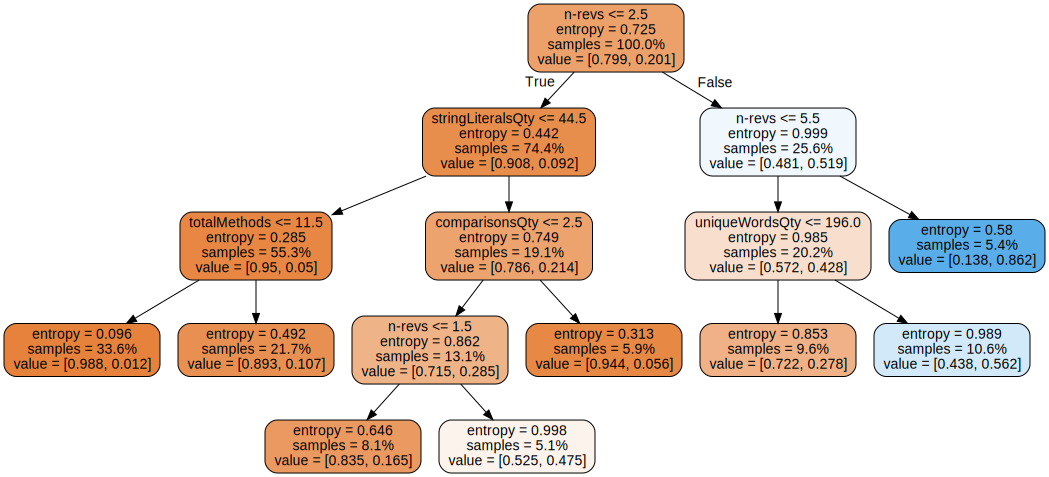

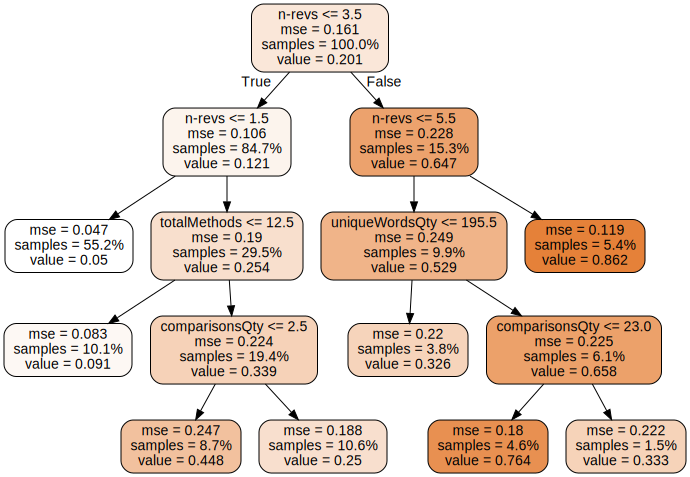

In [16]:
alteredData = metricsDataMaven['data'].drop(['netchurn','deleted'], axis=1)
addedModel = toolkit.refinement.makeAndUpdateModel(rootDirectory, alteredData, 2, 'added', modelInstance, modelSimpler, visualize=True, scoreOnly=False) 


### The model uses n-revs as the most important feature, but it does not classify '# lines added above the mean' very well

In [17]:
alteredData2 = metricsDataMaven['data'].drop(['netchurn','deleted','n-revs'], axis=1)
addedModel2 = toolkit.refinement.makeAndUpdateModel(rootDirectory, alteredData2, 3, 'added', modelInstance, modelSimpler, visualize=False, scoreOnly=False) 


Response variable was added
Model.score: 0.810000
accuracy_score: 0.810000
             precision    recall  f1-score   support

          0       0.83      0.96      0.89       640
          1       0.57      0.21      0.30       160

avg / total       0.78      0.81      0.77       800

roc_auc_score: 0.583594
        name  importance
1  n-authors    0.478648
Model.score: 0.745000
accuracy_score: 0.745000
             precision    recall  f1-score   support

          0       0.75      0.97      0.85       572
          1       0.72      0.17      0.28       228

avg / total       0.74      0.74      0.68       800

roc_auc_score: 0.572414
           name  importance
1     n-authors    0.568139
9  totalMethods    0.221690
Model.score: 0.113414
        name  importance
1  n-authors    0.634366
Model.score: 0.131041
        name  importance
1  n-authors    0.663789


### n-authors has similar problems with identifying the minority class

Response variable was added
Model.score: 0.810000
accuracy_score: 0.810000
             precision    recall  f1-score   support

          0       0.83      0.96      0.89       640
          1       0.57      0.21      0.30       160

avg / total       0.78      0.81      0.77       800

roc_auc_score: 0.583594
            name  importance
1  fractal-value    0.539915
Model.score: 0.752500
accuracy_score: 0.752500
             precision    recall  f1-score   support

          0       0.76      0.96      0.85       572
          1       0.70      0.23      0.34       228

avg / total       0.74      0.75      0.70       800

roc_auc_score: 0.594804
            name  importance
1  fractal-value    0.562188
8   totalMethods    0.225422
Model.score: 0.079674
            name  importance
1  fractal-value    0.561702
Model.score: 0.096250
            name  importance
1  fractal-value    0.653268
3   totalMethods    0.203916


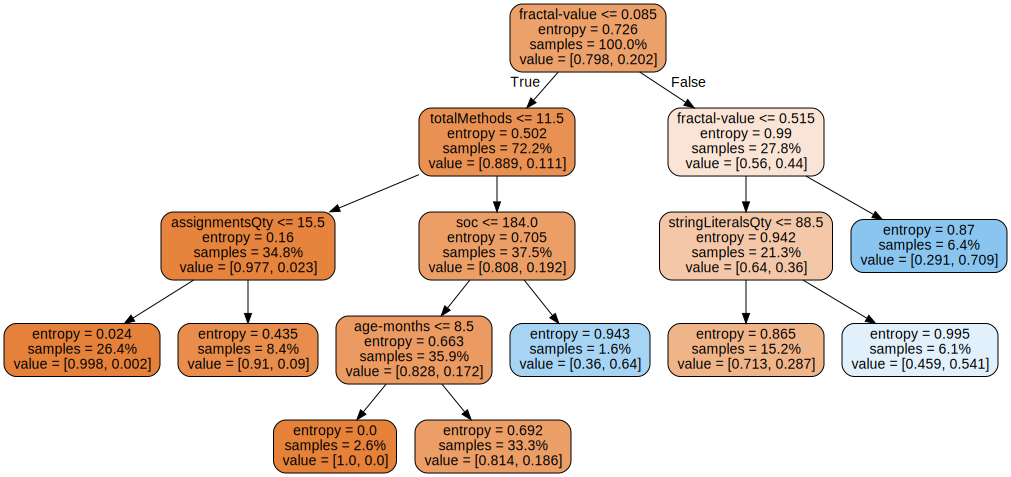

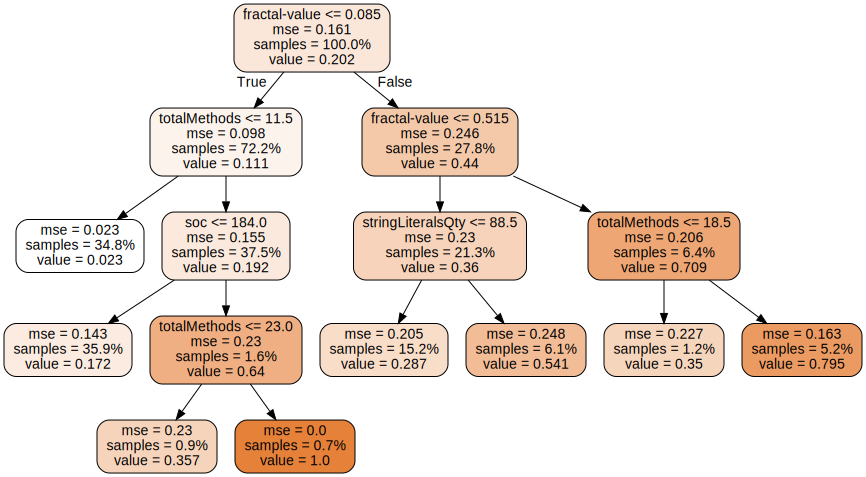

In [18]:
alteredData3 = metricsDataMaven['data'].drop(['netchurn','deleted','n-revs','n-authors'], axis=1)
addedModel3 = toolkit.refinement.makeAndUpdateModel(rootDirectory, alteredData3, 3, 'added', modelInstance, modelSimpler, visualize=True, scoreOnly=False) 

### fractal-value is derived from n-revs and n-authors

### Let's get rid of it and build a regression model for nline

# Java Code Metrics

### This model will predict the CBO (Coupling between objects)

In [19]:
from sklearn.tree import DecisionTreeRegressor
modelInstanceR = DecisionTreeRegressor(max_leaf_nodes=64)
modelInstanceRsimpler = DecisionTreeRegressor(max_leaf_nodes=32)
alteredData4 = metricsDataMaven['data']
nlineModelR = toolkit.refinement.makeAndUpdateModel(rootDirectory, alteredData4, 5, 'cbo', modelInstanceR, modelInstanceRsimpler, visualize=False, scoreOnly=False)

Response variable was cbo
Model.score: 0.816265
  name  importance
9  dit    0.764802
Model.score: 0.878399
  name  importance
9  dit    0.727792
Model.score: 0.516518
  name  importance
9  dit    0.704053
Model.score: 0.600809
  name  importance
9  dit    0.701926
Model.score: 0.893371
  name  importance
1  dit    0.790385
Model.score: 0.869611
  name  importance
1  dit    0.740799
Model.score: 0.539229
  name  importance
1  dit     0.71819
Model.score: 0.371796
  name  importance
1  dit    0.718562


### We see that the most important feature for predicting coupling between objects is RFC (Response for a Class). The RFC counts the number of unique method invocations in a class.

### It seems that the number of unique method invocations in a class is directly related to coupling between objects. What happens if we drop RFC from our dataframe?

In [20]:
from sklearn.tree import DecisionTreeRegressor
modelInstanceR = DecisionTreeRegressor(max_leaf_nodes=64)
modelInstanceRsimpler = DecisionTreeRegressor(max_leaf_nodes=32)
alteredData4 = metricsDataMaven['data'].drop(['rfc'],axis=1)
nlineModelR = toolkit.refinement.makeAndUpdateModel(rootDirectory, alteredData4, 5, 'cbo', modelInstanceR, modelInstanceRsimpler, visualize=False, scoreOnly=False)

Response variable was cbo
Model.score: 0.870037
  name  importance
9  dit    0.762281
Model.score: 0.880405
  name  importance
9  dit    0.729727
Model.score: 0.570387
  name  importance
9  dit    0.713723
Model.score: 0.444751
  name  importance
9  dit    0.709715
Model.score: 0.831470
  name  importance
1  dit    0.774201
Model.score: 0.826526
  name  importance
1  dit    0.777163
Model.score: 0.599939
  name  importance
1  dit    0.757939
Model.score: 0.130126
  name  importance
1  dit    0.731628


### The second most important feature for predicting coupling between objects appears to be the total number of variables in a class.

### This model will predict the LCOM (Lack of Cohesion of Methods)

In [21]:
from sklearn.tree import DecisionTreeRegressor
modelInstanceR = DecisionTreeRegressor(max_leaf_nodes=16)
modelInstanceRsimpler = DecisionTreeRegressor(max_leaf_nodes=16)
alteredData4 = metricsDataMaven['data']
nlineModelR = toolkit.refinement.makeAndUpdateModel(rootDirectory, alteredData4, 2, 'lcom', modelInstanceR, modelInstanceRsimpler, visualize=False, scoreOnly=False)

Response variable was lcom
Model.score: 0.379206
             name  importance
14  publicMethods    0.564282
21    totalFields    0.196105
Model.score: 0.529705
           name  importance
2  totalMethods    0.565853
4   totalFields    0.196828


### We see that the most important feature for predicting lack of cohesion of methods (LCOM) is the total number of methods in a class. 

### What happens if we drop 'totalMethods' from our dataframe?

In [22]:
from sklearn.tree import DecisionTreeRegressor
modelInstanceR = DecisionTreeRegressor(max_leaf_nodes=16)
modelInstanceRsimpler = DecisionTreeRegressor(max_leaf_nodes=16)
alteredData4 = metricsDataMaven['data'].drop(['totalMethods'],axis=1)
nlineModelR = toolkit.refinement.makeAndUpdateModel(rootDirectory, alteredData4, 2, 'lcom', modelInstanceR, modelInstanceRsimpler, visualize=False, scoreOnly=False)

Response variable was lcom
Model.score: 0.462378
             name  importance
13  publicMethods    0.566165
20    totalFields    0.196126
Model.score: 0.497130
            name  importance
0  publicMethods    0.567043
1    totalFields    0.196871


### It appears that the second most important feature for predicting lack of cohesion of methods is weight method class (WMC) or McCabe's complexity. This makes sense since it is a measure of the number of branch instructions in a class.

### This model predicts the size of files in terms of lines of code (loc)

In [23]:
from sklearn.tree import DecisionTreeRegressor
modelInstanceR = DecisionTreeRegressor(max_leaf_nodes=32)
modelInstanceRsimpler = DecisionTreeRegressor(max_leaf_nodes=16)
alteredData4 = metricsDataMaven['data']
nlineModelR = toolkit.refinement.makeAndUpdateModel(rootDirectory, alteredData4, 2, 'loc', modelInstanceR, modelInstanceRsimpler, visualize=False, scoreOnly=False)

Response variable was loc
Model.score: 0.927322
              name  importance
38  assignmentsQty    0.639115
13    totalMethods    0.260019
Model.score: 0.924734
             name  importance
8  assignmentsQty    0.643217
3    totalMethods    0.271598


### The most important feature for predicting size of a file by lines of code is the total number of assignments.

### This model predicts the WMC (Weight Method Class) or McCabe's complexity. 

In [24]:
from sklearn.tree import DecisionTreeRegressor
modelInstanceR = DecisionTreeRegressor(max_leaf_nodes=16)
modelInstanceRsimpler = DecisionTreeRegressor(max_leaf_nodes=16)
alteredData4 = metricsDataMaven['data']
nlineModelR = toolkit.refinement.makeAndUpdateModel(rootDirectory, alteredData4, 3, 'wmc', modelInstanceR, modelInstanceRsimpler, visualize=False, scoreOnly=False)

Response variable was wmc
Model.score: 0.872815
   name  importance
30  loc    0.776272
Model.score: 0.899081
   name  importance
30  loc    0.927521
Model.score: 0.920279
  name  importance
2  loc    0.929302
Model.score: 0.897271
  name  importance
2  loc    0.927521


### We can see there is a moderate correlation between WMC and the total number of methods.

In [25]:
# We use the Spearman measure of rank correlation
metricsDataMaven['data']['totalMethods'].corr(metricsDataMaven['data']['wmc'], method='spearman')

/opt/conda/envs/python2/lib/python2.7/site-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


0.15512870490022188

### In this case study, we have used the toolkit to do the following:
- Gather the Maven dataset
- Create regression models of net churn: above and below the mean, in 3 binned categories (low, medium, high)
- Create regression models to analyze coupling between objects, lack of cohesion of methods, and weighted method class.